# Homework 5

## Exercise 1

The article points to the sad fact that even nowadays the most educated **CS-professionals still ignore virtual memory (VM)** as a matter of routine. Namely, the classic algorithm of maintaining a binary heap works well only on paper, whereas in real life it becomes considerably inefficient when executing in VM. I find the article very accurate, reasonable and even vital.  
  
What the author indicates is that the **standard impicit indexing** of heap's nodes (i.e., i => 2*i, 2*i+1; and parent==i/2) **leads to far too many addresses to different virtual pages** and therefore **produces lots of page faults** to conduct basic operations. The reason is that the mentioned formula "leaves us with a heap built of virtual pages stacked one over the next, which causes (almost) all vertical traversals to hit a different VM page for each step up or down in the tree". The **B-heap**, proposed modified data structure, **builds the tree by filling pages vertically**, to match the direction we traverse the heap. **This rearrangement** increases the average number of comparison/swap operations required to keep the tree invariant true, but **ensures that most of those operations happen inside a single VM page and thus reduces the VM footprint and, consequently, VM page faults**.  
  
Instead of the standard indexing we should consider the following:  
* set the page size (psz) which must be a power of two
* this power of two is assigned to variable bh_shift
* set bh_mask as (psz - 1)
* let bh_len be the size of the heap
* then the inserted value of index idx=bh_len is written to the virtual page (idx >> bh_shift) on position (idx & bh_mask)

## Exercise 2

For 2D space, we have 6 different types of relationships (excluding wrong intervals with x > y):
* left non-overlapping  
* right non-overlapping  
* partially overlapping the left edge of the reference interval  
* partially overlapping the right edge of the reference interval
* subinterval
* interval that contains the reference interval

In [96]:
import matplotlib.pyplot as plt
import numpy as np

from enum import Enum
from matplotlib.colors import ListedColormap

In [33]:
class PointType(Enum):
    NONE = 0
    LEFT = 1
    RIGHT = 2
    OVERLAPPING_LEFT = 3
    OVERLAPPING_RIGHT = 4
    INNER = 5
    EMBRACING = 6

In [53]:
def classify(point, reference):
    if point[0] > point[1]:
        return PointType.NONE
    elif point[1] < reference[0]:
        return PointType.LEFT
    elif point[0] > reference[1]:
        return PointType.RIGHT
    else:
        if point[0] < reference[0]:
            if point[1] < reference[1]:
                return PointType.OVERLAPPING_LEFT
            else:
                return PointType.EMBRACING
        else:
            if point[1] < reference[1]:
                return PointType.INNER
            else:
                return PointType.OVERLAPPING_RIGHT

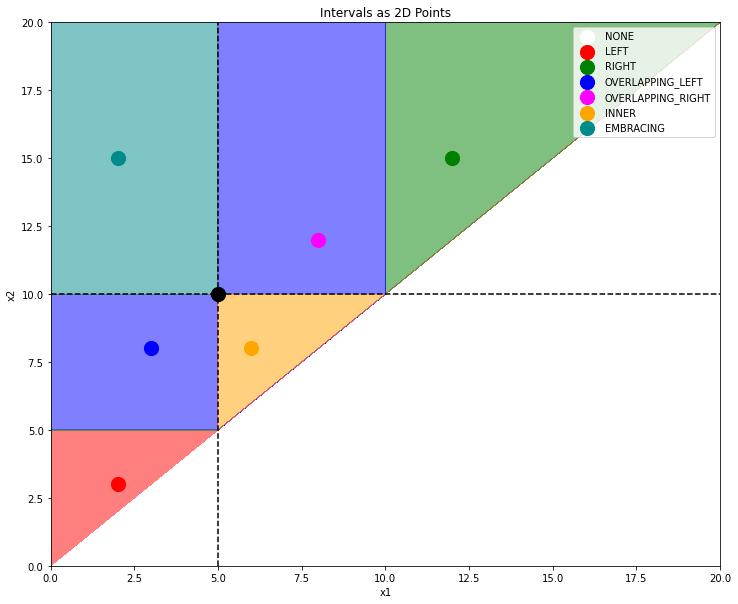

In [54]:
MIN = 0
MAX = 20

reference = [5, 10]
example_points = [[10, 5], [2, 3], [12, 15], [3, 8], [8, 12], [6, 8], [2, 15]]

X1, X2 = np.meshgrid(np.arange(MIN, MAX, step=0.01),
                     np.arange(MIN, MAX, step=0.01))

points = np.array([X1.ravel(), X2.ravel()]).T
classes = np.zeros(len(points))
for i, point in enumerate(points):
    classes[i] = classify(point, reference).value

plt.rcParams["figure.figsize"] = (12, 10)
colormap = ListedColormap(("white", "red", "green", "blue", "magenta", "orange", "darkcyan"))
    
plt.contourf(X1, X2, classes.reshape(X1.shape), alpha=0.5, cmap=colormap)
plt.xlim(MIN, MAX)
plt.ylim(MIN, MAX)

for i, point in enumerate(example_points):
    plt.scatter(point[0], point[1], s=200, label=classify(point, reference).name, color=colormap(i))
    
plt.scatter(reference[0], reference[1], s=200, c="black")
plt.plot([MIN, MAX], [reference[1], reference[1]], c="black", linestyle="--")
plt.plot([reference[0], reference[0]], [MIN, MAX], c="black", linestyle="--")

plt.title("Intervals as 2D Points")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.show()

For some reason, the OVERLAPPING_RIGHT region is not painted magenta. Despite the blue color, all the points of the region are of OVERLAPPING_RIGHT class (which proves the magenta examplary point).

## Exercise 3

In [234]:
import random
random.seed(511)

In [269]:
class TreapNode:
    
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.left = None
        self.right = None

    def left_rotate(self):
        a = self
        b = a.right
        
        a.right = b.left
        b.left = a
        a = b
        b = a.left
        
        return a

    def right_rotate(self):
        a = self
        b = a.left
        
        a.left = b.right
        b.right = a
        a = b
        b = a.right
        
        return a
    
    def __str__(self, level=0, is_left=None) :
        string = "       " * level
        
        if is_left is not None:
            if is_left:
                string += "l: "
            else:
                string += "r: "
        else:
            string += "root: "
        
        string += f"({self.key}, {self.priority})" + "\n"
        
        if self.left is not None:
            string += self.left.__str__(level + 1, True)
        else:
            string += "       " * (level + 1) + "l: None\n"
        if self.right is not None:
            string += self.right.__str__(level + 1, False)
        else:
            string += "       " * (level + 1) + "r: None\n"
            
        return string


class Treap:
    
    def __init__(self):
        self.root = None

    def insert(self, key, priority, demo=False):
        self.root = self.__insert_recursive(self.root, key, priority, demo)
        if demo:
            print('---------------RESULT----------------\n')
            print(self)
        
    def __insert_recursive(self, node, key, priority, demo):
        if node is None:
            node = TreapNode(key, priority)
            return node
        
        if key < node.key:
            node.left = self.__insert_recursive(node.left, key, priority, demo)
            
            if node.left.priority < node.priority:
                if demo:
                    print('-----------RIGHT ROTATION-----------')
                    print(self)
                    
                node = node.right_rotate()
        elif key >= node.key:
            node.right = self.__insert_recursive(node.right, key, priority, demo)
            
            if node.right.priority < node.priority:
                if demo:
                    print('-----------LEFT ROTATION------------')
                    print(self)
                    
                node = node.left_rotate()
        
        return node
    
    def __repr__(self):
        return str(self.root)

Let's insert [A, B, C, D, E, F, G, H, I] into a treap with random uniformly distributed priorities.

In [263]:
treap = Treap()
treap.insert('A', round(random.random(), 2))
treap.insert('B', round(random.random(), 2))
treap.insert('C', round(random.random(), 2))
treap.insert('D', round(random.random(), 2))
treap.insert('E', round(random.random(), 2))
treap.insert('F', round(random.random(), 2))
treap.insert('G', round(random.random(), 2))
treap.insert('H', round(random.random(), 2))
treap.insert('I', round(random.random(), 2))
print(treap)

root: (D, 0.05)
       l: (B, 0.19)
              l: (A, 0.41)
                     l: None
                     r: None
              r: (C, 0.9)
                     l: None
                     r: None
       r: (G, 0.06)
              l: (E, 0.13)
                     l: None
                     r: (F, 0.64)
                            l: None
                            r: None
              r: (H, 0.13)
                     l: None
                     r: (I, 0.17)
                            l: None
                            r: None



Let's insert the same values but with equal priorities. We see that the treap becomes very skewed, no rotations occur.

In [264]:
treap = Treap()
treap.insert('A', 1)
treap.insert('B', 1)
treap.insert('C', 1)
treap.insert('D', 1)
treap.insert('E', 1)
treap.insert('F', 1)
treap.insert('G', 1)
treap.insert('H', 1)
treap.insert('I', 1)
print(treap)

root: (A, 1)
       l: None
       r: (B, 1)
              l: None
              r: (C, 1)
                     l: None
                     r: (D, 1)
                            l: None
                            r: (E, 1)
                                   l: None
                                   r: (F, 1)
                                          l: None
                                          r: (G, 1)
                                                 l: None
                                                 r: (H, 1)
                                                        l: None
                                                        r: (I, 1)
                                                               l: None
                                                               r: None



Let's tune the priorities so that the treap eventually becomes ballanced on the same data.

In [271]:
treap = Treap()
treap.insert('A', 3)
treap.insert('B', 2)
treap.insert('C', 4)
treap.insert('D', 5)
treap.insert('E', 1)
treap.insert('F', 7)
treap.insert('G', 6)
treap.insert('H', 8)
treap.insert('I', 9)
print(treap)

root: (E, 1)
       l: (B, 2)
              l: (A, 3)
                     l: None
                     r: None
              r: (C, 4)
                     l: None
                     r: (D, 5)
                            l: None
                            r: None
       r: (G, 6)
              l: (F, 7)
                     l: None
                     r: None
              r: (H, 8)
                     l: None
                     r: (I, 9)
                            l: None
                            r: None



Let's demonstrate how E(1) is inserted.
* Firstly, it falls down as the rightest leaf.
* Then the left rotations are performed until E becomes the new root.

In [270]:
treap = Treap()
treap.insert('A', 3)
treap.insert('B', 2)
treap.insert('C', 4)
treap.insert('D', 5)
print(treap)
treap.insert('E', 1, demo=True)

root: (B, 2)
       l: (A, 3)
              l: None
              r: None
       r: (C, 4)
              l: None
              r: (D, 5)
                     l: None
                     r: None

-----------LEFT ROTATION------------
root: (B, 2)
       l: (A, 3)
              l: None
              r: None
       r: (C, 4)
              l: None
              r: (D, 5)
                     l: None
                     r: (E, 1)
                            l: None
                            r: None

-----------LEFT ROTATION------------
root: (B, 2)
       l: (A, 3)
              l: None
              r: None
       r: (C, 4)
              l: None
              r: (E, 1)
                     l: (D, 5)
                            l: None
                            r: None
                     r: None

-----------LEFT ROTATION------------
root: (B, 2)
       l: (A, 3)
              l: None
              r: None
       r: (E, 1)
              l: (C, 4)
                     l: None
         

## Exercise 4

Let's implement Union-Find with union by rank and switchable path compression.  
The algorithm of merging subsets follows the steps:  
* find the father of the first subset (go up the hierarchy of subsets until the father of the current subsets is the subset itself);
* find the father of the second subset;
* link the subsets, i.e., make the subset with greater rank (depth) the father of the subset with smaller rank, so that our tree does not become skewed.  
  
Path compression links all the subsets on the way of searching the element directly to parent, so that next search could be performed faster.


In [272]:
class UnionFind:
    
    def __init__(self, values, compression=False):
        self.values = values
        size = len(values)
        self.compression = compression
        
        self.parent = [0] * size
        for i in range(size):
            self.parent[i] = i
        
        self.rank = [0] * size
        
    def maxdepth(self):
        return max(self.rank) + 1
    
    def link(self, x, y):
        i = self.values.index(x)
        j = self.values.index(y)
        
        if self.rank[i] > self.rank[j]:
            self.parent[j] = i
        else:
            self.parent[i] = j
            if self.rank[i] == self.rank[j]:
                self.rank[j] += 1
    
    def find(self, x, demo=False):
        i = self.values.index(x)
        
        if demo:
            print(f"Searching for subset containing {x}.")
            
        found = self.__find_recursive(i, demo)
        value = self.values[found]
        
        if demo:
            print(f"Found: {value}.")
            
        return value
    
    def __find_recursive(self, i, demo):
        if demo:
            print(f"The parent of {self.values[i]} is {self.values[self.parent[i]]}.")
        
        if self.parent[i] != i:
            if self.compression:
                self.parent[i] = self.__find_recursive(self.parent[i], demo)
            else:
                i = self.__find_recursive(self.parent[i], demo)
            
        return self.parent[i]
    
    def union(self, x, y):
        self.link(self.find(x), self.find(y))
        
    def same_subset(self, x, y):
        parentx = self.find(x)
        parenty = self.find(y)
        
        return parentx == parenty
        
        
    def __repr__(self):
        result = "--------------------------------Union-Find--------------------------------\n"
        result += "Unions:        " + "\t".join(str(self.values[i]) for i in self.parent) + "\n"
        result += "Values:        " + "\t".join(str(x) for x in self.values) + "\n"
        
        return result

In [273]:
def merge_subsets(subsets):
    subsets.union(1, 2)
    subsets.union(3, 4)
    subsets.union(5, 6)
    subsets.union(6, 7)
    subsets.union(3, 7)
    subsets.union(4, 8)
    subsets.union(1, 6)

Let's initialize a union-find. As for now, each elements has its own independent subset and max tree depth (hight) is 1.

In [274]:
subsets = UnionFind(list(range(1, 9)))
print(subsets)
print(f"Max tree depth is {subsets.maxdepth()}.")

--------------------------------Union-Find--------------------------------
Unions:        1	2	3	4	5	6	7	8
Values:        1	2	3	4	5	6	7	8

Max tree depth is 1.


If two nodes belong to the same subset, they have the same parent. Let's use the structure to check if this algorithm works on the current union. The right answer for any pair of subsets should be false.

In [88]:
print(subsets.same_subset(1, 2))

False


Let's merge the subsets as described in the above function. Now max tree depth is 3.

In [275]:
merge_subsets(subsets)
print(subsets)
print(f"Max tree depth is {subsets.maxdepth()}.")

--------------------------------Union-Find--------------------------------
Unions:        2	6	4	6	6	6	6	6
Values:        1	2	3	4	5	6	7	8

Max tree depth is 3.


Let's check whether 1 and 2 are in one subset now. We should get a positive result.

In [95]:
print(subsets.same_subset(1, 2))

True


Let's find the subset to which 3 belongs. We see that there are 3 comparisons done.

In [90]:
subsets.find(3, demo=True)

Searching for subset containing 3.
The parent of 3 is 4.
The parent of 4 is 6.
The parent of 6 is 6.
Found: 6.


6

Now, let's enable path compression and perform the search again, paying attention to how the tree changes and the number of comparisons done.

In [280]:
subsets = UnionFind(list(range(1, 9)), compression=True)
merge_subsets(subsets)
print(subsets)
print(f"Max tree depth is {subsets.maxdepth()}.")

--------------------------------Union-Find--------------------------------
Unions:        2	6	4	6	6	6	6	6
Values:        1	2	3	4	5	6	7	8

Max tree depth is 3.


In [281]:
subsets.find(3, demo=True)

Searching for subset containing 3.
The parent of 3 is 4.
The parent of 4 is 6.
The parent of 6 is 6.
Found: 6.


6

In [283]:
print(subsets)
print(f"Max tree depth is {subsets.maxdepth()}.")

--------------------------------Union-Find--------------------------------
Unions:        2	6	6	6	6	6	6	6
Values:        1	2	3	4	5	6	7	8

Max tree depth is 3.


In [284]:
subsets.find(3, demo=True)

Searching for subset containing 3.
The parent of 3 is 6.
The parent of 6 is 6.
Found: 6.


6

We see that the tree changed, namely 3 now has 6 as parent. Also, the search now takes only 2 comparisons.

## Exercise 5

In [144]:
data = np.array([[73.64, 10.36, 97.37, 53.80],
                 [34.17, 94.43, 33.35, 73.01],
                 [32.08, 97.13, 25.58, 43.36],
                 [51.45, 89.81, 38.43, 48.67],
                 [15.24, 95.85, 97.98, 81.92],
                 [44.86, 2.32, 29.15, 81.43],
                 [34.50, 28.76, 48.76, 66.48],
                 [67.45, 22.75, 53.81, 40.16],
                 [7.51, 90.28, 81.90, 45.47],
                 [77.12, 26.87, 22.04, 81.32],
                 [71.35, 66.32, 86.06, 35.05],
                 [23.59, 38.70, 26.60, 47.57],
                 [17.07, 44.94, 41.63, 72.22],
                 [12.07, 61.15, 20.94, 37.69],
                 [48.47, 37.50, 25.41, 82.65],
                 [92.62, 66.00, 54.00, 65.94],
                 [79.05, 60.91, 1.42, 39.06],
                 [1.54, 83.79, 92.31, 63.50],
                 [20.09, 65.39, 75.14, 69.09]])

Let's define a function for vector normalization by formula $\frac{a}{\|{a}\|}$.

In [145]:
def normalize_vector(v):
    return v / np.sqrt(np.sum(v ** 2))

Let's define a function for projection of vectors onto a unit vector ($\|u\| = 1$) by formula $a_u = (a * u) * u$, where $*$ is a scalar product.

In [146]:
def calculate_projections(points, unit):
    projections = np.tile(unit, (len(points), 1))
    products = np.sum(points * unit, axis=1)
    
    for i in range(len(products)):
        projections[i] *= products[i]
    
    return projections

Let's define a function for calculating distance from the point to the hyperplane. The hyperplane is represented by its normal (which is our initially set unit vector) and a shift from the origin (the shift is calculated beforehand by formula $-median * unit$). The formula is $point * normal + shift$.

In [194]:
def calculate_distances(points, normal, shift):
    return np.sum(points * normal, axis=1) + shift

Now, let's do hyperplane construction step by step:
* set unit vector $unit = (1, 1, 1, 1)$ and normalize it;
* calculate projections of the points onto the unit;
* find median with numpy.median();
* as soon as our hyperplane crosses the median, we calculate the shift from the origin by the formula mentioned before;
* finally, we calculate all distances from the points to the separating hyperplane; negative distances signify the points located on the left hand and positive distances signify the points located on the right hand from the hyperplane.

In [216]:
unit = np.ones(4)
unit = normalize_vector(unit)
projections = calculate_projections(data, unit)

median = np.median(projections, axis=0)
shift = -np.sum(median * unit)

distances = calculate_distances(data, unit, shift)
print(distances)

[ 13.91   13.805  -4.6    10.505  41.82  -24.795 -14.425 -11.59    8.905
   0.     25.715 -35.445 -15.745 -37.75   -6.66   35.605 -13.455  16.895
  11.18 ]


In [291]:
print("Labels of points:")
print([np.all(projection > median) for projection in projections])

Labels of points:
[True, True, False, True, True, False, False, False, True, False, True, False, False, False, False, True, False, True, True]


Let's check if the partition is even.

In [217]:
print(np.sum(distances < 0) == np.sum(distances > 0))

True
